We nned to create: 
1/a 2D array to represent the states in the environment (done)
2/a q-table dictionary for each of the state, filed with uniformly distributed values between 110-120 (done)
3/a loop that gives -1 reward for each step taken, and -30 reward when in the hole region, and +100 reward when reaching the goal
4/the action of the agent + the randomness of the action
5/an agent that starts from state 1, and stops at state 25, then starts a new iteration. 1000 iterations are performed.


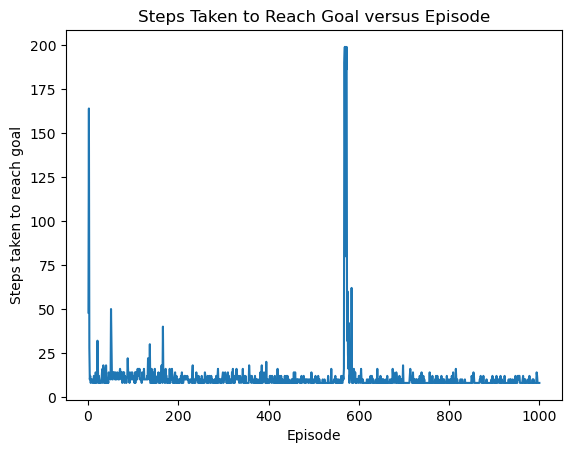

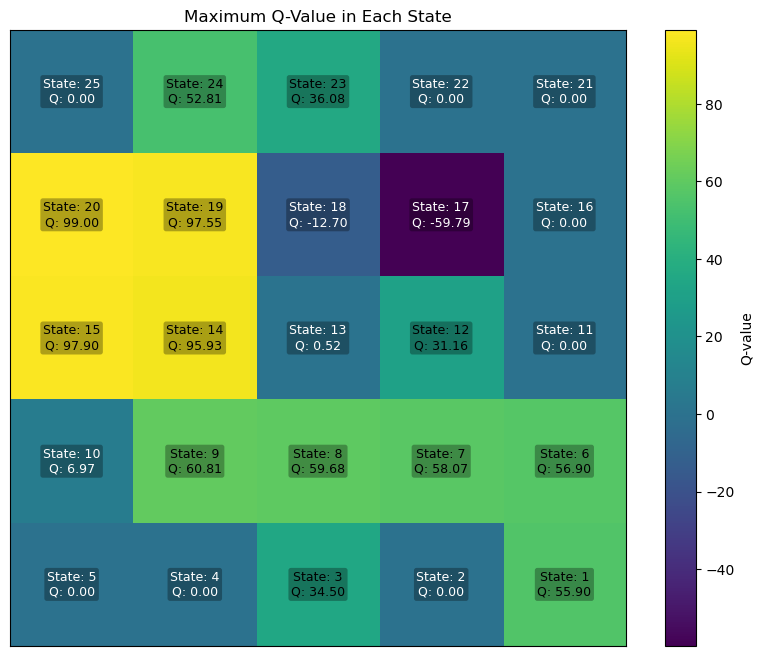

{1: [55.897899764590605, 0.0, -440.6582223133103, 0.0], 2: [-6.952576009366114, 0.0, -632.4889926364776, -1886.336579682393], 3: [34.49895259721196, 0.0, -715.7043116765998, -516.3594674785702], 4: [-1459.3979572755784, 0.0, -1748.532563901232, -110.54103668991631], 5: [-414.21042182388874, 0.0, 0.0, -1791.3370901098733], 6: [-117.49814401145441, -72.79115539404577, 56.90376023608047, 0.0], 7: [-30.631526609974205, -94.57028155041868, 58.07430474566231, -257.73980522646076], 8: [-173.04472850704175, -30.50624482425696, 59.6787772341828, -94.4024995239447], 9: [60.8148733936163, -613.9712851333164, -435.6563145989962, -33.10978630021058], 10: [-1005.7354385339557, -837.887989880031, 0.0, 6.9693808540048225], 11: [-978.2656634123703, -343.39281838870113, -59.63367003783918, 0.0], 12: [-361.76390317989836, 31.164802373093544, -510.75231771981004, -385.43531206010005], 13: [-817.5718588612409, 0.5242893099898902, -1821.7270843861113, -370.9329831466768], 14: [-306.4178169312, 12.4680128990

In [30]:
#1/a 2D array to represent the states in the environment (done)
environment = [(25,24,23,22,21),
(20,19,18,17,16),
(15,14,13,12,11),
(10,9,8,7,6),
(5,4,3,2,1)]

#2/a q-table dictionary for each of the state, filed with uniformly distributed values between 110-120
import random
import matplotlib.pyplot as plt
import numpy as np

states = list(range(1, 26, 1))
#generate a list of 4 uniformly distributed random values between 110 and 120
q_table = {state: [0.0 for _ in range(4)] for state in states}


#3/a loop that gives -1 reward for each step taken, and -30 reward when in the hole region, and +100 reward when reaching the goal
direction = [5,-5,1,-1] #up, down, left, right
S0 = 1 #initial position
next_state = S0;

step_memory = {}

#4/the action of the agent + the randomness of the action
def decision(start_state):
    if start_state == 1:
        q_value_options = [q_table[start_state][i] for i in [0,2]]
        allowable_movement = [0,2]    
    elif start_state == 5:
        q_value_options = [q_table[start_state][i] for i in [0,3]]
        allowable_movement = [0,3]
    elif start_state == 21:
        q_value_options = [q_table[start_state][i] for i in [1,2]]
        allowable_movement = [1,2]
    elif start_state in (6,11,16):
        q_value_options = [q_table[start_state][i] for i in [0,1,2]]
        allowable_movement = [0,1,2]
    elif start_state in (2,3,4):
        q_value_options = [q_table[start_state][i] for i in [0,2,3]]
        allowable_movement = [0,2,3]
    elif start_state in (10,15,20):
        q_value_options = [q_table[start_state][i] for i in [0,1,3]]
        allowable_movement = [0,1,3]
    elif start_state in (22,23,24):
        q_value_options = [q_table[start_state][i] for i in [1,2,3]]
        allowable_movement = [1,2,3]
    else:
        q_value_options = [q_table[start_state][i] for i in [0,1,2,3]]
        allowable_movement = [0,1,2,3]
    
    determination = 0.8 + iteration*(1/1000)*0.15
    if random.random() < determination:
        return allowable_movement[q_value_options.index(max(q_value_options))]
    else:
        return random.choice(allowable_movement)
#the output of the function is the index of the q-value in the list, which is equivalent to the index in the variable "direction"


graph_step = []
graph_iteration = list(range(1,1001))

#5/an agent that starts from state 1, and stops at state 25, then starts a new iteration. 1000 iterations are performed.
for iteration in range(1000):
    next_state = 1
    step_memory = {}
    step = 1
    while next_state < 25:
        if step < 200:
            start_state = next_state
            movement = decision(start_state)
            next_state = start_state + direction[movement]
            step_memory[step] = [next_state,start_state, movement]
            step = step + 1
        else:
            break
    
    sequence = list(reversed(list(step_memory.items())))
    #reversed because you will be updating backwards, so the first element of the list will now be state 25
    #revered does not output a list, so another list wrapped outside
    
    total_return_Gt = 0
    overstep_penalty = -10

    for i in sequence: 
        #first if loop to define action rewards
        if i[1][0] == 25:
            #i[1]refers to the values(in a form of list) in the original dictionary step_memory, i[1][0] refers to the next state
            action_reward = 99 #+100 reaching goal and -1 taking a step
        elif i[1][0] in (13,14,18,19) and i[1][1] not in (13,14,18,19): #if your start start state is not in the hole but you've stepped into the hole
            action_reward = -31 #-30 for dropping into the hole and -1 taking a step
        else:
            action_reward = -1
        #second if loop to define overstep penalty
        if i[0] <20: #if steps taken so far are less than 20
            total_return_Gt = action_reward + total_return_Gt
        else:
            total_return_Gt = action_reward + total_return_Gt + overstep_penalty

        q_table[i[1][1]][i[1][2]] = q_table[i[1][1]][i[1][2]]*0.9 + total_return_Gt*0.1
        #updates q-table
        #q-table is in the format of {state:[q1 q2 q3 q4]}, where each q represents a direction to move
        #q_table[i[1][1]]means searching for the key in the q-table that is equivalent to the start_state in step_memory,[i[1][2]]uses the movement index 
        #to point to the q-value that should be updated
    
    graph_step.append(list(step_memory.keys())[-1])
    iteration = iteration + 1

# Plot the number of steps taken to reach the goal over iterations
plt.plot(graph_iteration, graph_step)
plt.xlabel("Episode")
plt.ylabel("Steps taken to reach goal")
plt.title("Steps Taken to Reach Goal versus Episode")
plt.show()


# Extract the maximum Q-value for each state
max_q_values = {state: max(q_table[state]) for state in states}
max_q_grid = np.zeros((5, 5))

for i, row in enumerate(environment):
    for j, state in enumerate(row):
        max_q_grid[i, j] = max_q_values[state]

# Create and display the heatmap
plt.figure(figsize=(10, 8))
plt.imshow(max_q_grid, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Q-value')
plt.title("Maximum Q-Value in Each State")

# Add text annotations to each cell with state number and Q-value
for i in range(5):
    for j in range(5):
        state_num = environment[i][j]
        q_val = max_q_grid[i, j]
        # Use white text for darker backgrounds, black for lighter
        text_color = 'white' if q_val < np.median(max_q_grid) else 'black'
        plt.text(j, i, 
                 f"State: {state_num}\nQ: {q_val:.2f}", 
                 ha="center", 
                 va="center",
                 color=text_color,
                 fontsize=9,
                 bbox=dict(facecolor='black', alpha=0.3, edgecolor='none', boxstyle='round,pad=0.2'))

plt.xticks([])
plt.yticks([])
plt.show()
  
print(q_table)
print(f"Final Steps taken: {list(step_memory.keys())[-1]}\nFinal Path taken: {[value[0] for value in step_memory.values()]}")
